<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/Regression/blob/main/Simple_Linear_Regression_by_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [ ]:
df['district'].value_counts()

,count
district,
Чиланзарский,1616
Мирзо-Улугбекский,1342
Учтепинский,872
Юнусабадский,847
Мирабадский,717
Яккасарайский,628
Яшнободский,456
Шайхантахурский,356
Олмазорский,262


In [ ]:
housing = df[df['district'] == "Чиланзарский"]

In [ ]:
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [ ]:
X = housing['size'].to_numpy()

In [29]:
Y = housing['price'].to_numpy()

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

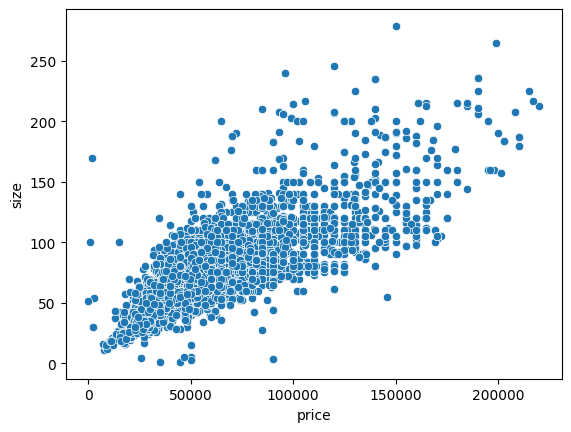

In [31]:
sns.scatterplot(data = df, x = 'price', y = 'size')
plt.show()

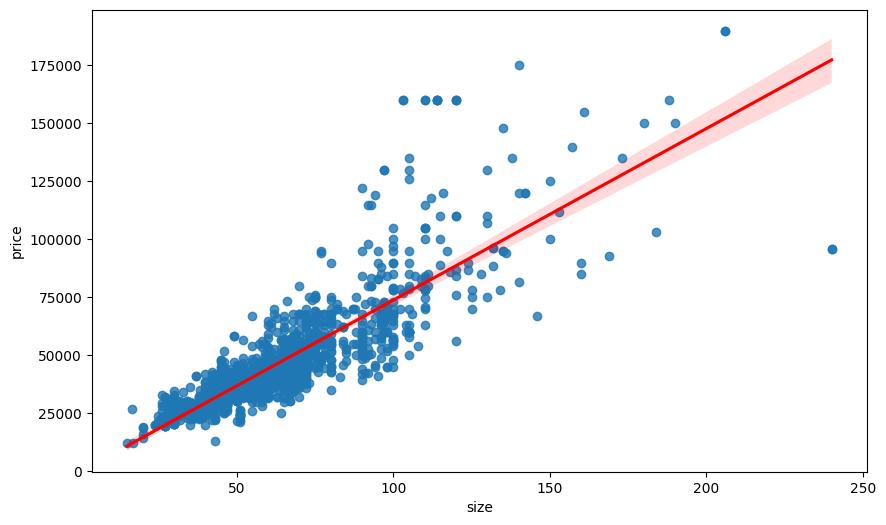

In [32]:
plt.figure(figsize = (10, 6))
sns.regplot(data = housing, x = 'size', y = 'price', line_kws = {'color':'red'})
plt.show()

In [37]:
# Mean values
X_mean = np.mean(X)
Y_mean = np.mean(Y)
print(X_mean, Y_mean)

61.90783415841584 45617.487623762376


In [38]:
# Theta 0 and Theta 1
k1 = np.sum((X - X_mean)*(Y - Y_mean)) / np.sum(np.square((X - X_mean)))
k0 = Y_mean - k1 * X_mean

In [44]:
housing_sample = housing[['size', 'price']].sample(5)
X_sample = housing_sample['size'].to_numpy()
Y_sample = housing_sample['price'].to_numpy()
Y_predicted = k0 + k1 * X_sample # prediction
print(pd.DataFrame({"Bashorat" : Y_predicted, "Real narx" : Y_sample}))

       Bashorat  Real narx
0  22004.845355    27000.0
1  30885.163142    36800.0
2  33105.242589    34500.0
3  30885.163142    28000.0
4  53085.957610    43000.0


In [47]:
# Mean square error
mse = np.sum(np.abs(Y_predicted - Y_sample)) / len(Y_predicted)
mse

np.float64(5055.173933342539)

In [48]:
# Root mean square error
rmse = mse = np.sqrt(np.sum((Y_predicted - Y_sample) ** 2) / len(Y_predicted))
rmse

np.float64(5864.007511798597)